## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.layers import GaussianNoise

## Loading the images from MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

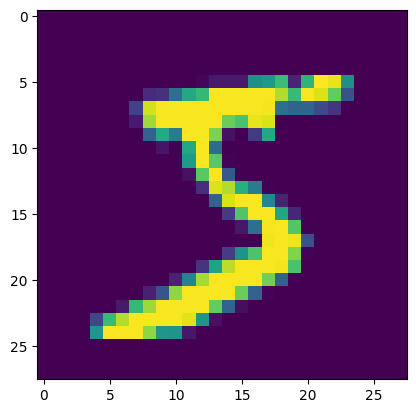

In [3]:
plt.imshow(X_train[0])

## Normalizing the images

In [4]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

## Setting the random seed

In [5]:
tf.random.set_seed(101)

## Creating the encoder

In [6]:
encoder = Sequential()

encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2)) # it will add noise to the images

encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

## Creating the decoder

In [7]:
decoder = Sequential()

decoder.add(Dense(50, input_shape=[25], activation='relu')) 
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

## Creating and training the Autoencoder

In [8]:
noise_remover_autoencoder = Sequential([encoder, decoder])

In [9]:
noise_remover_autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
noise_remover_autoencoder.fit(x=X_train_scaled, y=X_train_scaled, epochs=8, validation_data=[X_test_scaled, X_test_scaled])

Epoch 1/8


1875/1875 [==============================] - 22s 10ms/step - loss: 0.1744 - accuracy: 0.1769 - val_loss: 0.1380 - val_accuracy: 0.2242
Epoch 2/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1319 - accuracy: 0.2311 - val_loss: 0.1248 - val_accuracy: 0.2316
Epoch 3/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1220 - accuracy: 0.2446 - val_loss: 0.1142 - val_accuracy: 0.2516
Epoch 4/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1162 - accuracy: 0.2529 - val_loss: 0.1098 - val_accuracy: 0.2619
Epoch 5/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1131 - accuracy: 0.2589 - val_loss: 0.1076 - val_accuracy: 0.2605
Epoch 6/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1105 - accuracy: 0.2644 - val_loss: 0.1075 - val_accuracy: 0.2644
Epoch 7/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1085 - accuracy: 0.2683 - val_loss: 0.1056 - val_

## Creating 10 noisy images out of the testing images

In [11]:
gaussian_noise = GaussianNoise(0.2) 

In [12]:
ten_noisy_images = gaussian_noise(X_test_scaled[:10], training=True)

## Removing the noise from the images

In [13]:
denoised_images = noise_remover_autoencoder.predict(ten_noisy_images)

1/1 [==============================] - 0s 258ms/step


## Comparing the Original Image, Noisy Image and the Image after Removal of Noise

ORIGINAL IMAGE


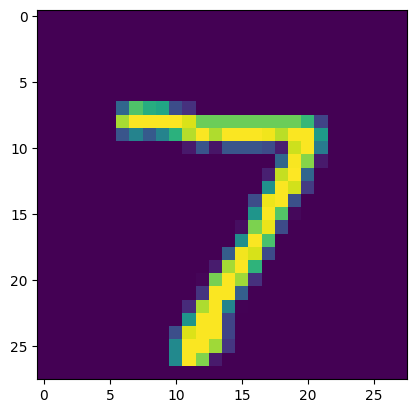

NOISY IMAGE


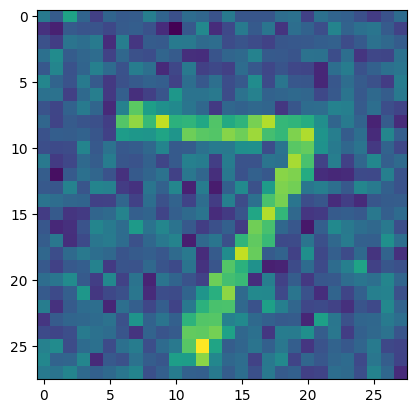

DENOSIED IMAGE


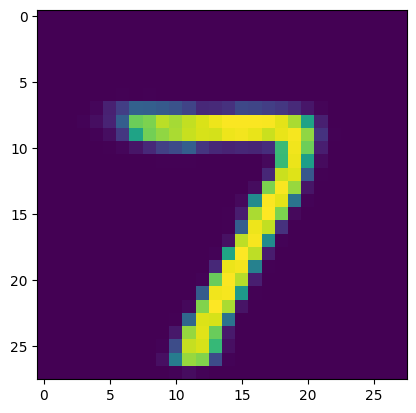

In [14]:
n = 0

print("ORIGINAL IMAGE")
plt.imshow(X_test_scaled[n])

plt.show()

print("NOISY IMAGE")

plt.imshow(ten_noisy_images[n])

plt.show()

print("DENOSIED IMAGE")

plt.imshow(denoised_images[n])

plt.show()
